# PHYS 404, Homework 7, 3/4/2023

### Write a shooting method to calculate the Legendre polynomials with n=5

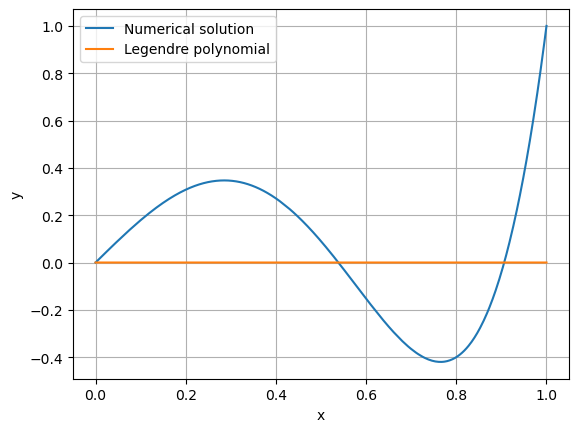

In [14]:
# Legendre polynomials by the shooting method
from math import *
import matplotlib.pyplot as plt

global n # polynomial order

# The Legendre function given in the text book
def Legendre(n, x):
    if (n == 0):
        f = 1.0; d = 0.0
    else:
        f = x; fm1 = 1.0
        for i in range(2,n+1):
            fm2 = fm1; fm1 = f
            f = ((2*i-1)*x*fm1 - (i-1)*fm2)/i

        d=n*(x*f-fm1)/(x*x-1.0) if (x*x-1.0) else 0.5*n*(n+1)*f/x
    return (f, d)

def eul(x, h, y, dy, Ledg):
    dy += h * Ledg(x,y,dy)
    y += h * dy
    return (y, dy)

def Ledg(x, y, dy): # set up the Legendre function
    return (2.0*x*dy - n*(n+1)*y) / (1.0 - x*x)

def Propag(x, y, nx, y0, dy0, f): # search the numerical expression of the Legendre function
    h = x[2] - x[1]
    y[1] = y0; dy = dy0
    for m in range(1,nx):
        (y[m+1], dy) = eul(x[m],h,y[m],dy,Ledg)

def Shoot(x, y, nx, ya, yb, dy1, dy2, eps, Ledg):
    itmax = 100 # max. number of bisections
    Propag(x,y,nx,ya,dy1,Ledg) # propagate y for dy1
    f1 = y[nx] - yb # deviation at xb
    Propag(x,y,nx,ya,dy2,Ledg) # propagate y for dy2
    f2 = y[nx] - yb # deviation at xb

    if (f1*f2 < 0): # check if dy exists in [dy1,dy2]
        exist = True
        for it in range(1,itmax+1): # refine dy by bisection
            dy = (dy1 + dy2)/2. # new approximation
            Propag(x,y,nx,ya,dy,Ledg) # propagate y
            f = y[nx] - yb # deviation at xb
            if (f1*f > 0):
                dy1 = dy # new semi interval
            else:
                dy2 = dy
            if (fabs(f) <= eps):
                break # deviation vanishes at xb ?
        if (it >= itmax):
            print("Shoot: max. no. of bisections exceeded !")
        else:
            dy = 1e10
            exist = False
    return (dy, exist)
 
# main
n=5 # order of Legendre polynomial
# boundary values
xa = 0. # intial x
xb = 1. # intial y
yb = 1. # end of y
eps = 1e-4 # tolerance for solution at xb
h = 1e-4 # x-mesh step size
nx = int((xb-xa)/h + 0.5) + 1 # number of x-mesh points
x = [0]*(nx+1);
y = [0]*(nx+1) # x-mesh, solution

for m in range(1,nx+1): 
    x[m] = xa + (m-1)*h # generate x-mesh

if (n % 2 == 0): # even solutions: rescaling
    ya = 1.
    dy = 0.
    Propag(x,y,nx,ya,dy,Ledg)
    for m in range(1,nx+1): 
        y[m] /= y[nx] # normalization
else: # odd solutions: shooting
    ya = 0.
    dy1 = -1e3 
    dy2 = 1e3 # search initial derivative in [dy1,dy2]
    (dy, exist) = Shoot(x,y,nx,ya,yb,dy1,dy2,eps,Ledg)
    
out = open("shoot.txt","w")
for m in range(1,nx+1):
    (P, d) = Legendre(n,x[m])
    out.write(("{0:10.5f}{1:10.5f}{2:10.5f}\n").format(x[m],y[m],P-y[m]))
out.close()

# load data from file
data = []
with open('shoot.txt', 'r') as f:
    for line in f:
        data.append(list(map(float, line.split())))

# plot numerical solution and Legendre polynomial
x = [row[0] for row in data]
y = [row[1] for row in data]
P = [row[2] for row in data]
plt.plot(x, y, label='Numerical solution')
plt.plot(x, P, label='Legendre polynomial')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()